In [1]:
# import library
import mlmodels
import autogluon as ag

/home/jalfaizy/miniconda3/envs/py36/lib/python3.6/site-packages/mxnet/optimizer/optimizer.py:167: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  Optimizer.opt_registry[name].__name__))


## Define model and data definitions

In [2]:
model_uri = "model_gluon.gluon_automl.py"
data_pars = {"train": True, "uri_type": "amazon_aws", "dt_name": "Inc"}

model_pars = {"model_type": "tabular",
              "learning_rate": ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
              "activation": ag.space.Categorical(*tuple(["relu", "softrelu", "tanh"])),
              "layers": ag.space.Categorical(
                          *tuple([[100], [1000], [200, 100], [300, 200, 100]])),
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
              'num_boost_round': 10,
              'num_leaves': ag.space.Int(lower=26, upper=30, default=36)
             }


compute_pars = {
    "hp_tune": True,
    "num_epochs": 10,
    "time_limits": 120,
    "num_trials": 5,
    "search_strategy": "skopt"
}

out_pars = {
    "out_path": "dataset/"
}

## Load parameters and train

In [3]:
from mlmodels.models import module_load
from mlmodels.model_gluon.util_autogluon import fit, metrics

module        =  module_load( model_uri= model_uri )                           # Load file definition
model         =  module.Model(model_pars=model_pars, compute_pars=compute_pars)             # Create Model instance

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to dataset/
Train Data Rows:    39073
Train Data Columns: 15
Preprocessing data ...
Here are the first 10 unique label values in your data:  [' Tech-support' ' Transport-moving' ' Other-service' ' ?'
 ' Handlers-cleaners' ' Sales' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Prof-specialty']
AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == object)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Feature Generator processed 39073 data points with 14 features
Original Features:
	int features: 6
	object features: 8
Generated Features:
	int features: 0
All Features:
	int features: 6
	object features: 8
	Data preprocessing and feature engine

Finished Task with config: {'activation.choice': 0, 'dropout_prob': 0.1, 'embedding_size_factor': 1.0, 'layers.choice': 0, 'learning_rate': 0.0005, 'network_type.choice': 0, 'use_batchnorm.choice': 0, 'weight_decay': 1e-06} and reward: 0.3862
Finished Task with config: b'\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x00X\x0c\x00\x00\x00dropout_probq\x02G?\xb9\x99\x99\x99\x99\x99\x9aX\x15\x00\x00\x00embedding_size_factorq\x03G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00layers.choiceq\x04K\x00X\r\x00\x00\x00learning_rateq\x05G?@bM\xd2\xf1\xa9\xfcX\x13\x00\x00\x00network_type.choiceq\x06K\x00X\x14\x00\x00\x00use_batchnorm.choiceq\x07K\x00X\x0c\x00\x00\x00weight_decayq\x08G>\xb0\xc6\xf7\xa0\xb5\xed\x8du.' and reward: 0.3862
Finished Task with config: b'\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x00X\x0c\x00\x00\x00dropout_probq\x02G?\xb9\x99\x99\x99\x99\x99\x9aX\x15\x00\x00\x00embedding_size_factorq\x03G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00layers.choiceq\x04K\

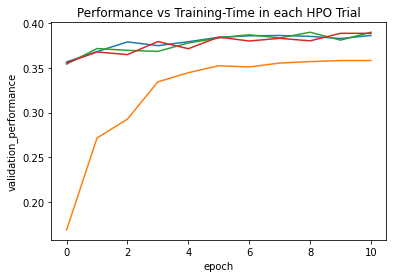

In [4]:
model   =  fit(model, data_pars=data_pars, model_pars=model_pars, compute_pars=compute_pars, out_pars=out_pars)          # fit the model

## Check inference

In [5]:
ypred       = module.predict(model,  data_pars=data_pars, compute_pars=compute_pars, out_pars=out_pars)     # predict pipeline
ypred

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


array([' Other-service', ' Craft-repair', ' Exec-managerial', ...,
       ' Transport-moving', ' Other-service', ' Craft-repair'],
      dtype=object)

## Command line test

In [1]:
!ml_models --model_uri model_gluon/gluon_automl.py --do test

test
model_gluon/gluon_automl.py
model_gluon.gluon_automl.py
/home/jalfaizy/miniconda3/envs/py36/lib/python3.6/site-packages/mxnet/optimizer/optimizer.py:167: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  Optimizer.opt_registry[name].__name__))
<module 'mlmodels.model_gluon.gluon_automl' from '/home/jalfaizy/workspace/upwork/mlmodels/mlmodels/mlmodels/model_gluon/gluon_automl.py'>
<module 'mlmodels.model_gluon.gluon_automl' from '/home/jalfaizy/workspace/upwork/mlmodels/mlmodels/mlmodels/model_gluon/gluon_automl.py'>

  ('#### Loading params   ##############################################',) 

  ('#### Model params   ################################################',) 

  ('#### Loading dataset   #############################################',) 
Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073

  ('#### Model init, fit   ##########

 60%|███████████████████████████                  | 3/5 [00:51<00:32, 16.24s/it]Finished Task with config: {'activation.choice': 2, 'dropout_prob': 0.4131577384353976, 'embedding_size_factor': 0.6654938211776524, 'layers.choice': 1, 'learning_rate': 0.00588093414606025, 'network_type.choice': 0, 'use_batchnorm.choice': 0, 'weight_decay': 0.0006452853419260255} and reward: 0.3726
Finished Task with config: b"\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x02X\x0c\x00\x00\x00dropout_probq\x02G?\xdaq-'\xaa\xd6\xb6X\x15\x00\x00\x00embedding_size_factorq\x03G?\xe5K\xb9\xb2\xb4\xbd&X\r\x00\x00\x00layers.choiceq\x04K\x01X\r\x00\x00\x00learning_rateq\x05G?x\x16\x9b=<s^X\x13\x00\x00\x00network_type.choiceq\x06K\x00X\x14\x00\x00\x00use_batchnorm.choiceq\x07K\x00X\x0c\x00\x00\x00weight_decayq\x08G?E%\x0b\xb8W-\x88u." and reward: 0.3726
Finished Task with config: b"\x80\x03}q\x00(X\x11\x00\x00\x00activation.choiceq\x01K\x02X\x0c\x00\x00\x00dropout_probq\x02G?\xdaq-'\xaa\xd6\xb6X\x15\x00\x